# Load libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from ydata_profiling import ProfileReport
import warnings

%matplotlib inline

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load data set

In [42]:
# Define path to file
file_path_vgsales = Path("data/vgsales.csv")

# Load the CSV
vgsales = pd.read_csv(file_path_vgsales)

# Display first rows

In [43]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Describe

In [44]:
vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Info

In [45]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Create report

In [46]:
profile = ProfileReport(vgsales, title="Profiling Report")

In [47]:
# profile.to_notebook_iframe()
# profile.to_widgets()
profile.to_file("report_original_dataset.html")

Summarize dataset:  72%|███████▏  | 13/18 [00:00<00:00,  6.13it/s, Calculate auto correlation]   c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Sports'')
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 99.98it/s]


# Remove rows with missing values

In [48]:
vgsales_without_na = vgsales.dropna()

In [49]:
vgsales_without_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


# Feature selection

## Platform

In [50]:
vgsales_without_na.Platform.value_counts()

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [51]:
console_fullname = {
    'DS': 'Nintendo DS',
    'PS2': 'PlayStation 2',
    'PS3': 'PlayStation 3',
    'Wii': 'Nintendo Wii',
    'X360': 'Xbox 360',
    'PSP': 'PlayStation Portable',
    'PS': 'PlayStation',
    'PC': 'Personal Computer',
    'XB': 'Xbox',
    'GBA': 'Game Boy Advance',
    'GC': 'GameCube',
    '3DS': 'Nintendo 3DS',
    'PSV': 'PlayStation Vita',
    'PS4': 'PlayStation 4',
    'N64': 'Nintendo 64',
    'SNES': 'Super Nintendo Entertainment System',
    'XOne': 'Xbox One',
    'SAT': 'Sega Saturn',
    'WiiU': 'Nintendo Wii U',
    '2600': 'Atari 2600',
    'NES': 'Nintendo Entertainment System',
    'GB': 'Game Boy',
    'DC': 'Dreamcast',
    'GEN': 'Genesis (Mega Drive)',
    'NG': 'Neo Geo',
    'SCD': 'Sega CD',
    'WS': 'WonderSwan',
    '3DO': '3DO Interactive Multiplayer',
    'TG16': 'TurboGrafx-16',
    'GG': 'Game Gear',
    'PCFX': 'PC-FX'
}

In [ ]:
# Apply the mapping to the dataset
vgsales_without_na.loc[:,"Platform_fullname"] = vgsales_without_na["Platform"].map(console_fullname)

In [53]:
(
    vgsales_without_na
    .groupby(["Platform", "Platform_fullname"])[["Platform", "Platform_fullname"]]
    .value_counts()
    .sort_values(ascending=False)
)

Platform  Platform_fullname                  
DS        Nintendo DS                            2131
PS2       PlayStation 2                          2127
PS3       PlayStation 3                          1304
Wii       Nintendo Wii                           1290
X360      Xbox 360                               1234
PSP       PlayStation Portable                   1197
PS        PlayStation                            1189
PC        Personal Computer                       938
XB        Xbox                                    803
GBA       Game Boy Advance                        786
GC        GameCube                                542
3DS       Nintendo 3DS                            499
PSV       PlayStation Vita                        410
PS4       PlayStation 4                           336
N64       Nintendo 64                             316
SNES      Super Nintendo Entertainment System     239
XOne      Xbox One                                213
SAT       Sega Saturn               

## Developer

In [54]:
console_developers = {
    'DS': 'Nintendo',
    'PS2': 'Sony',
    'PS3': 'Sony',
    'Wii': 'Nintendo',
    'X360': 'Microsoft',
    'PSP': 'Sony',
    'PS': 'Sony',
    'PC': 'Various',
    'XB': 'Microsoft',
    'GBA': 'Nintendo',
    'GC': 'Nintendo',
    '3DS': 'Nintendo',
    'PSV': 'Sony',
    'PS4': 'Sony',
    'N64': 'Nintendo',
    'SNES': 'Nintendo',
    'XOne': 'Microsoft',
    'SAT': 'Sega',
    'WiiU': 'Nintendo',
    '2600': 'Atari',
    'NES': 'Nintendo',
    'GB': 'Nintendo',
    'DC': 'Sega',
    'GEN': 'Sega',
    'NG': 'SNK',
    'SCD': 'Sega',
    'WS': 'Bandai',
    '3DO': 'The 3DO Company',
    'TG16': 'NEC',
    'GG': 'Sega',
    'PCFX': 'NEC'
}



In [ ]:
# Apply the mapping to the dataset
vgsales_without_na.loc[:,"console_developers"] = vgsales_without_na["Platform"].map(console_developers)

In [56]:
(
    vgsales_without_na
    .groupby(["Platform", "console_developers"])[["Platform", "console_developers"]]
    .value_counts()
    .sort_values(ascending=False)
)

Platform  console_developers
DS        Nintendo              2131
PS2       Sony                  2127
PS3       Sony                  1304
Wii       Nintendo              1290
X360      Microsoft             1234
PSP       Sony                  1197
PS        Sony                  1189
PC        Various                938
XB        Microsoft              803
GBA       Nintendo               786
GC        Nintendo               542
3DS       Nintendo               499
PSV       Sony                   410
PS4       Sony                   336
N64       Nintendo               316
SNES      Nintendo               239
XOne      Microsoft              213
SAT       Sega                   173
WiiU      Nintendo               143
2600      Atari                  116
NES       Nintendo                98
GB        Nintendo                97
DC        Sega                    52
GEN       Sega                    27
NG        SNK                     12
SCD       Sega                     6
WS       

## Sales

In [57]:
# A treshold to filter the sales
threshold_sales = 5

# Filter the dataset
vgsales_filtered_gl = vgsales_without_na[vgsales_without_na["Global_Sales"] < threshold_sales]
vgsales_filtered_na = vgsales_without_na[vgsales_without_na["NA_Sales"] < threshold_sales]
vgsales_filtered_eu = vgsales_without_na[vgsales_without_na["EU_Sales"] < threshold_sales]
vgsales_filtered_jp = vgsales_without_na[vgsales_without_na["JP_Sales"] < threshold_sales]
vgsales_filtered_ot = vgsales_without_na[vgsales_without_na["Other_Sales"] < threshold_sales]

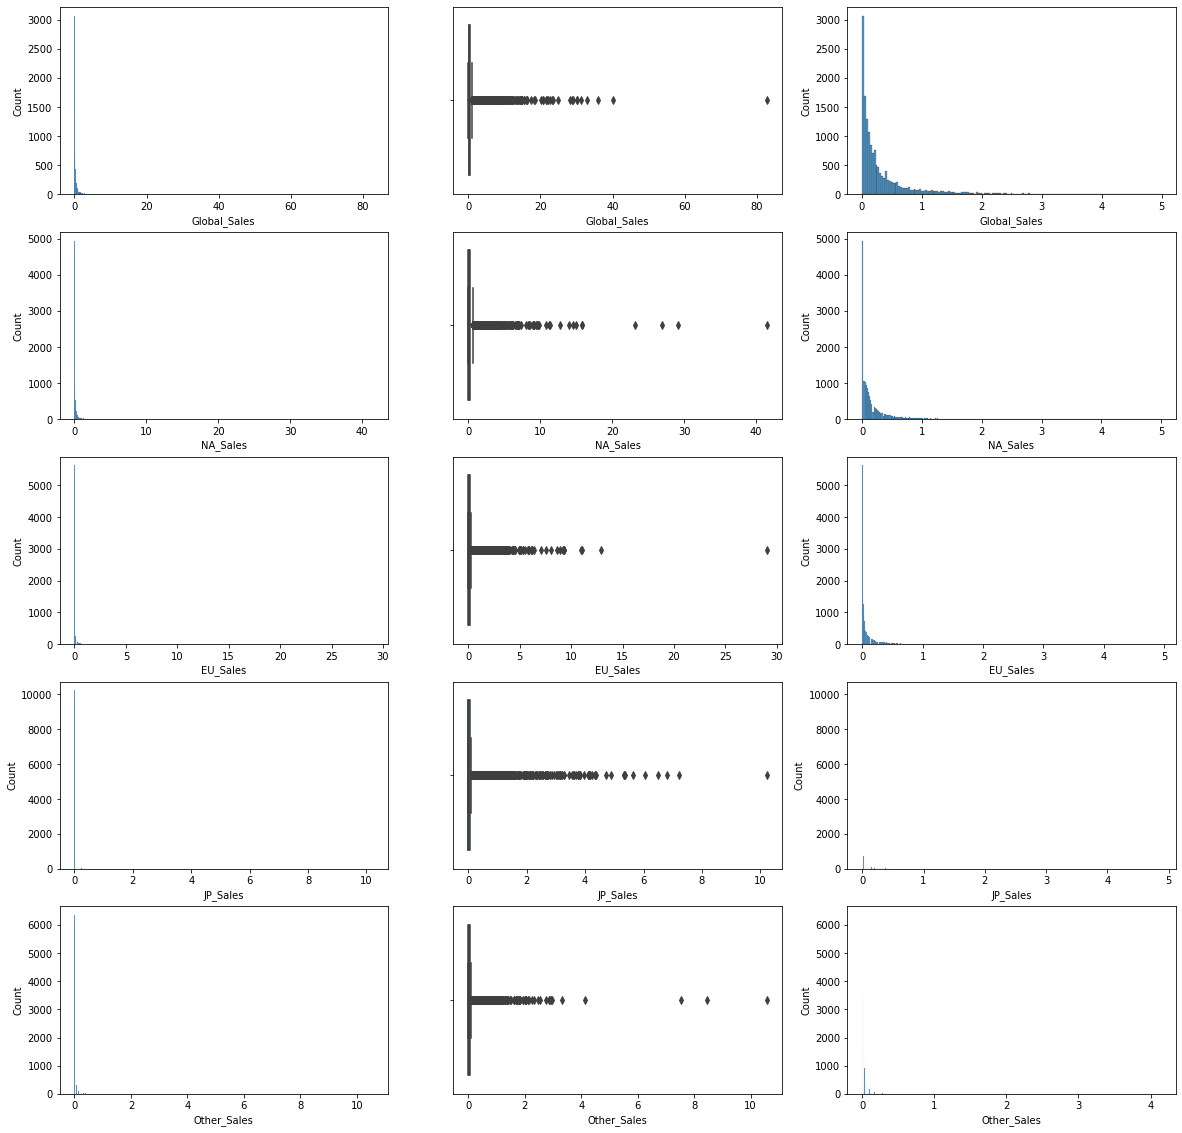

In [58]:
plt.figure(figsize=(20, 20))

all_d = [vgsales_filtered_gl, vgsales_filtered_na, vgsales_filtered_eu, vgsales_filtered_jp, vgsales_filtered_ot]
columns = ["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
i = 1

for n, d in enumerate(all_d):
    plt.subplot(5, 3, i)
    sns.histplot(vgsales_without_na, x=columns[n]) # 
    i += 1

    plt.subplot(5, 3, i)
    sns.boxplot(x=columns[n], data=vgsales_without_na)
    i += 1

    plt.subplot(5, 3, i)
    sns.histplot(d, x=columns[n])
    i += 1

In [59]:
vgsales_without_na[vgsales_without_na["Global_Sales"] > threshold_sales].Name.unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii',
       'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris',
       'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii',
       'Duck Hunt', 'Nintendogs', 'Mario Kart DS',
       'Pokemon Gold/Pokemon Silver', 'Wii Fit', 'Wii Fit Plus',
       'Kinect Adventures!', 'Grand Theft Auto V',
       'Grand Theft Auto: San Andreas', 'Super Mario World',
       'Brain Age: Train Your Brain in Minutes a Day',
       'Pokemon Diamond/Pokemon Pearl', 'Super Mario Land',
       'Super Mario Bros. 3', 'Grand Theft Auto: Vice City',
       'Pokemon Ruby/Pokemon Sapphire', 'Pokemon Black/Pokemon White',
       'Brain Age 2: More Training in Minutes a Day',
       'Gran Turismo 3: A-Spec', 'Call of Duty: Modern Warfare 3',
       'Pokémon Yellow: Special Pikachu Edition',
       'Call of Duty: Black Ops', 'Pokemon X/Pokemon Y',
       'Call of Duty: Black Ops 3', 'Call of Duty: Black Ops II',
       'Call of Duty: Modern War

## Year

In [60]:
vgsales_without_na.Year.value_counts().sort_values(ascending=False)

Year
2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64

In [61]:
vgsales_without_na.Year.value_counts().sort_index(axis=0)

Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     744
2005.0     936
2006.0    1008
2007.0    1201
2008.0    1428
2009.0    1431
2010.0    1257
2011.0    1136
2012.0     655
2013.0     546
2014.0     580
2015.0     614
2016.0     342
2017.0       3
2020.0       1
Name: count, dtype: int64

For the year 2017 there are only 3 titles and 1 for the year 2020.

Therefore, I selected the range from 1980 to 2016.

In [62]:
vgsales_filtered_year = vgsales_without_na[vgsales_without_na["Year"] < 2017]

# Conclusions

There are a lot of outliers in the sales features (`Global_Sales`, `NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`), but they correspond to important video game titles that cannot be excluded from the analysis. So I included the outliers in the analysis.

The features were selected based on the plots above and on the report generated with `ProfileReport`.



**Excluded Features**:
- `Rank` (not interesting)
- `Platform` (acronyms, I used the full names of the console, see `Platform_fullname`)

**Included Features**:
- `Name`
- `Year` (only year from 1980 to 2016)
- `Genre`
- `Publisher`
- `NA_Sales`
- `EU_Sales`
- `JP_Sales`
- `Other_Sales`
- `Global_Sales`
- `Platform_fullname`



In [63]:
vgsales_filtered_year.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Platform_fullname', 'console_developers'],
      dtype='object')

In [64]:
selected_features = [
    "Name", "Year", "Genre", "Publisher", "NA_Sales", "EU_Sales",
    "JP_Sales", "Other_Sales", "Global_Sales", "Platform_fullname",
    "console_developers"
]

In [65]:
data_to_csv = vgsales_filtered_year[selected_features]

In [66]:
# Dictionary with new column names
new_column_names = {
    "NA_Sales":"Sales North America",
    "EU_Sales":"Sales Europe",
    "JP_Sales":"Sales Japan",
    "Other_Sales":"Sales other regions",
    "Global_Sales":"Sales worldwide",
    "Platform_fullname":"Platform",
    "console_developers":"Console Developer"
}

# Rename columns
data_to_csv = data_to_csv.rename(columns=new_column_names)

In [67]:
data_to_csv.columns

Index(['Name', 'Year', 'Genre', 'Publisher', 'Sales North America',
       'Sales Europe', 'Sales Japan', 'Sales other regions', 'Sales worldwide',
       'Platform', 'Console Developer'],
      dtype='object')

In [68]:
# conver "Year" to integer
data_to_csv["Year"] = data_to_csv["Year"].astype(int)

In [69]:
data_to_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16287 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 16287 non-null  object 
 1   Year                 16287 non-null  int32  
 2   Genre                16287 non-null  object 
 3   Publisher            16287 non-null  object 
 4   Sales North America  16287 non-null  float64
 5   Sales Europe         16287 non-null  float64
 6   Sales Japan          16287 non-null  float64
 7   Sales other regions  16287 non-null  float64
 8   Sales worldwide      16287 non-null  float64
 9   Platform             16287 non-null  object 
 10  Console Developer    16287 non-null  object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


In [70]:
data_to_csv.to_csv("data/global_videogame_sales.csv", index=False)

# Create report for selected features

In [71]:
profile_sf = ProfileReport(data_to_csv, title="Profiling Report for Selected Features")

In [72]:
profile_sf.to_file("report_selected_features.html")

Summarize dataset:  72%|███████▏  | 13/18 [00:00<00:00,  5.21it/s, Calculate auto correlation]          c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Nintendo'')
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 111.09it/s]


# Sales worldwide

In Tableau, I can print the max `Sales worldwide`, but not the min `Sales worldwide`
because there are more Title with the same minimum value after the year 1996.


In [73]:
(
    data_to_csv[data_to_csv["Year"] == 1995]
    .groupby(["Name", "Sales worldwide"])[["Name", "Sales worldwide"]]
    .value_counts()
    .reset_index(name='Counts')
    .sort_values(ascending=False, by="Sales worldwide")
)

,Name,Sales worldwide,Counts
42,Donkey Kong Country 2: Diddy's Kong Quest,5.15,1
205,Warcraft II: Tides of Darkness,4.21,1
171,Super Mario World 2: Yoshi's Island,4.12,1
112,Namco Museum Vol.1,3.84,1
179,Tekken,3.24,1
...,...,...,...
214,You Don't Know Jack,0.02,1
6,Aquanaut's Holiday,0.02,1
5,America Oudan Ultra-Quiz,0.02,1
167,Super Dodge Ball,0.02,1


In [74]:
(
    data_to_csv[data_to_csv["Year"] == 1996]
    .groupby(["Name", "Sales worldwide"])[["Name", "Sales worldwide"]]
    .value_counts()
    .reset_index(name='Counts')
    .sort_values(ascending=False, by="Sales worldwide")
)

,Name,Sales worldwide,Counts
160,Pokemon Red/Pokemon Blue,31.37,1
210,Super Mario 64,11.89,1
105,Mario Kart 64,9.87,1
37,Crash Bandicoot,6.82,1
221,Tekken 2,5.74,1
...,...,...,...
50,Discworld II: Mortality Bytes!,0.02,1
25,Brain Dead 13,0.02,1
184,Shippuu Mahou Daisakusen: Kingdom-Grandprix,0.02,1
249,Victory Spike,0.01,1


In [75]:
(
    data_to_csv[data_to_csv["Year"] == 2004]
    .groupby(["Name", "Sales worldwide"])[["Name", "Sales worldwide"]]
    .value_counts()
    .reset_index(name='Counts')
    .sort_values(ascending=False, by="Sales worldwide")
)

,Name,Sales worldwide,Counts
246,Grand Theft Auto: San Andreas,20.81,1
244,Gran Turismo 4,11.66,1
446,Pokemon FireRed/Pokemon LeafGreen,10.49,1
581,Super Mario 64,10.42,1
257,Halo 2,8.49,1
...,...,...,...
655,Tiger Woods PGA Tour 2005,0.01,1
221,Football Manager 2005,0.01,1
388,Myst IV: Revelation,0.01,1
706,Wade Hixton's Counter Punch,0.01,1
